In [1]:
!pip install -U umap-learn

Requirement already up-to-date: umap-learn in ./anaconda3/lib/python3.7/site-packages (0.3.7)
Requirement not upgraded as not directly required: scipy>=0.19 in ./anaconda3/lib/python3.7/site-packages (from umap-learn) (1.1.0)
Requirement not upgraded as not directly required: scikit-learn>=0.16 in ./anaconda3/lib/python3.7/site-packages (from umap-learn) (0.19.2)
Requirement not upgraded as not directly required: numpy>=1.13 in ./anaconda3/lib/python3.7/site-packages (from umap-learn) (1.15.1)
Requirement not upgraded as not directly required: numba>=0.37 in ./anaconda3/lib/python3.7/site-packages (from umap-learn) (0.39.0)
Requirement not upgraded as not directly required: llvmlite>=0.24.0dev0 in ./anaconda3/lib/python3.7/site-packages (from numba>=0.37->umap-learn) (0.24.0)
twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import scipy

from nilearn.datasets import fetch_neurovault_ids
import warnings

import numpy as np
from scipy import stats
from sklearn.decomposition import FastICA

from nilearn import datasets
from nilearn.image import smooth_img

from nilearn.datasets import load_mni152_brain_mask
from nilearn.input_data import NiftiMasker

from nilearn import plotting

from nilearn.datasets import fetch_neurovault
from nilearn.datasets.neurovault import basic_collection_terms, NotNull
import matplotlib.pyplot as plt
%matplotlib inline

/home/ssouravsingh12/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/ssouravsingh12/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized
/home/ssouravsingh12/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [3]:
nv_data = fetch_neurovault_ids(collection_ids=(1952,))

images = nv_data['images']

Reading local neurovault data.
Already fetched 1 image
Already fetched 2 images
Already fetched 3 images
Already fetched 4 images
Already fetched 5 images
Already fetched 6 images
Already fetched 7 images
Already fetched 8 images
Already fetched 9 images
Already fetched 10 images
Already fetched 11 images
Already fetched 12 images
Already fetched 13 images
Already fetched 14 images
Already fetched 15 images
Already fetched 16 images
Already fetched 17 images
Already fetched 18 images
Already fetched 19 images
Already fetched 20 images
Already fetched 21 images
Already fetched 22 images
Already fetched 23 images
Already fetched 24 images
Already fetched 25 images
Already fetched 26 images
Already fetched 27 images
Already fetched 28 images
Already fetched 29 images
Already fetched 30 images
Already fetched 31 images
Already fetched 32 images
Already fetched 33 images
Already fetched 34 images
Already fetched 35 images
Already fetched 36 images
Already fetched 37 images
Already fetched 3

In [4]:
print("\nReshaping and masking images.\n")
from nilearn.masking import compute_background_mask

mask = compute_background_mask(images)
masker = NiftiMasker(mask_img=mask).fit()
X = masker.transform(images)


Reshaping and masking images.



In [5]:
import umap

embedding = umap.UMAP(n_neighbors=5,min_dist=0.3,metric='correlation').fit_transform(X)

/home/ssouravsingh12/anaconda3/lib/python3.7/site-packages/numba/typing/context.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import defaultdict, Sequence
/home/ssouravsingh12/anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 10 separate connected components using meta-embedding (experimental)
  n_components
/home/ssouravsingh12/anaconda3/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


/home/ssouravsingh12/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):


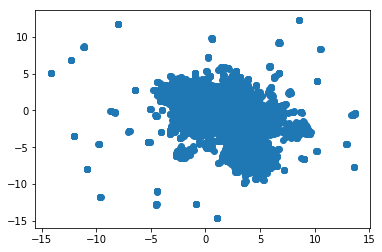

In [6]:
plt.scatter(embedding[:,0], embedding[:,1])

In [9]:
from sklearn.neighbors import LocalOutlierFactor


clf = LocalOutlierFactor(n_jobs=-1)
y_pred = clf.fit_predict(X)

/home/ssouravsingh12/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


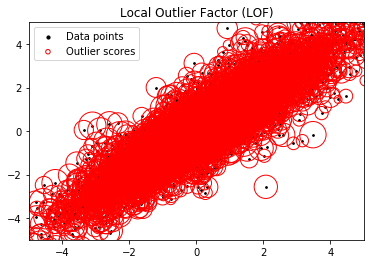

In [13]:
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()